In [89]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('cork_property_prices*.csv')], ignore_index = True)

In [42]:
print("Length before dedupes:,", len(df))
df = df.drop_duplicates()
print("Length after dedupes:,", len(df))

Length before dedupes:, 557
Length after dedupes:, 212


In [43]:
df.head()
df.describe()

,listing_id,beds,bathrooms,num_pics
count,2.120000e+02,212.000000,212.000000,212.000000
mean,2.347525e+06,3.698113,2.367925,18.523585
std,2.425052e+05,0.888791,1.142256,10.144660
min,1.199531e+06,2.000000,0.000000,1.000000
25%,2.250624e+06,3.000000,1.000000,12.000000
50%,2.407504e+06,4.000000,2.000000,17.000000
75%,2.533277e+06,4.000000,3.000000,23.000000
max,2.570839e+06,8.000000,6.000000,69.000000


In [44]:
# Clean data
df['cost'] = df['cost'].str.replace(",","") # Remove commas in cost column
df = df[(df.cost.str.isnumeric() == True)] # Remove rows with alpha characters
df['cost'] = pd.to_numeric(df['cost'])
df['cost'] = df['cost']/1000

# Create an ordinal equivalent of BER
df['ber'] = pd.Categorical(df['ber'])
df['ber_ord'] = df.ber.cat.codes
type(df['ber_ord'])

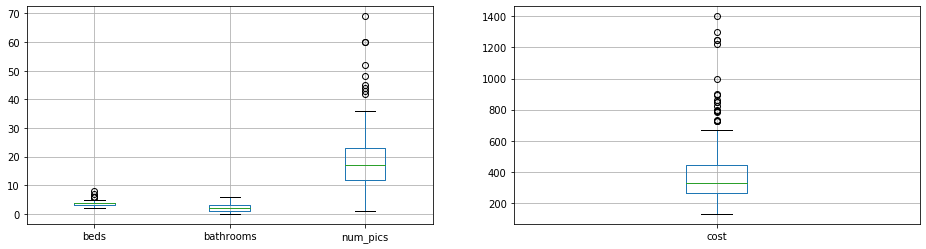

In [45]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.tight_layout()
plt.subplot(1, 2, 1)
pd.DataFrame(df,columns=["beds","bathrooms","num_pics"]).boxplot()
plt.subplot(1, 2, 2)
pd.DataFrame(df,columns=["cost"]).boxplot()

<Figure size 1152x288 with 0 Axes>

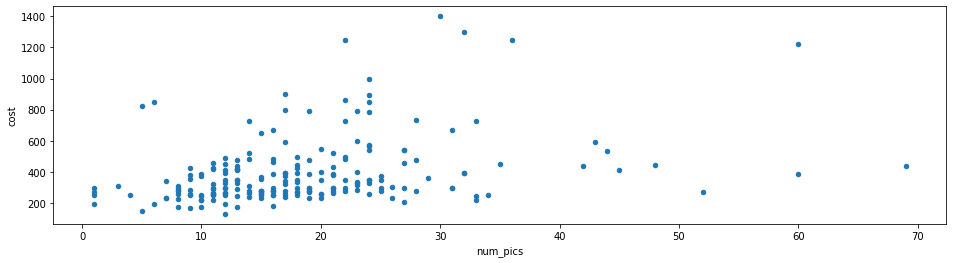

In [112]:
#plt.rcParams['figure.figsize'] = [16, 4]
plt.tight_layout()
#plt.subplot(1, 2, 1)
# df.plot.scatter(x='beds',y='cost')
#df.plot.scatter(x='beds',y='cost')
#pd.DataFrame(df,columns=["beds","bathrooms","num_pics"]).boxplot()
#plt.subplot(1, 2, 2)
#df.plot.scatter(x='bathrooms',y='cost')
#pd.DataFrame(df,columns=["cost"]).boxplot()

#plt.subplot(1, 2, 2)

#plt.subplot(2, 2, 3)
df.plot.scatter(x='num_pics',y='cost')
#plt.subplot(2, 2, 4)
#df.plot.scatter(x='ber_ord',y='cost')

In [46]:
# Explore data by location
#df.plot.line(data=df["beds","cost"], x="beds", y="cost")
#df[["beds","cost","location"]].groupby('location','beds').plot(x="beds", y="cost")
df.groupby(['location', 'beds'])['cost'].agg(['count','mean'])

count         mean
location        beds                    
ballincollig    3        14   248.535714
                4        18   378.388889
bishopstown     2         1   285.000000
                3         4   332.500000
                4        12   414.750000
                5         3   449.666667
blackrock       2         1   269.000000
                3         3   331.666667
                4        11   447.909091
                6         2  1057.500000
carrigaline     2         1   265.000000
                3        25   238.840000
                4        19   416.578947
                5         4   417.500000
                6         1  1400.000000
douglas         2         3   236.333333
                3        21   280.952381
                4        20   456.350000
                5         8   860.625000
                6         2   785.000000
                7         1   825.000000
glasheen        2         1   180.000000
                3         9   307.666667
                4         3   386.666667
grange          3         1   275.000000
model-farm-road 2         1   250.000000
                3         5   559.000000
                4         3   558.333333
                5         2   637.500000
wilton          3         2   257.500000
                5         1   475.000000
                8         1   465.000000

In [48]:
# Create an ordinal equivalent of BER
df['ber'] = pd.Categorical(df['ber'])
df['ber_ord'] = df.ber.cat.codes
type(df['ber_ord'])

pandas.core.series.Series

In [51]:
df.head()

,listing_id,location,address,beds,bathrooms,cost,num_pics,property_type,ber,ber_ord
0,2549894,douglas,Kincora| South Douglas Road| Douglas| Co. Cork,3,1,259.0,24,Semi-Detached House,NaN,-1
1,2255069,douglas,Denmead| 38 Hettyfield Park| Douglas| Co. Cork,4,4,795.0,23,Detached House,D1,6
2,2217312,douglas,80 Yewlands| Maryborough Woods| Douglas| Co. Cork,3,3,310.0,8,Terraced House,C1,3
3,2548380,douglas,115 Greenhills Court| South Douglas Road| Doug...,3,2,245.0,33,Terraced House,C3,5
4,2255031,douglas,10 Springbrook| Donnybrook| Douglas| Co. Cork,3,3,249.0,16,Semi-Detached House,D1,6


In [62]:
df.ber.isnull().describe()

count       203
unique        2
top       False
freq        172
Name: ber, dtype: object

In [63]:
df

,listing_id,location,address,beds,bathrooms,cost,num_pics,property_type,ber,ber_ord
0,2549894,douglas,Kincora| South Douglas Road| Douglas| Co. Cork,3,1,259.0,24,Semi-Detached House,NaN,-1
1,2255069,douglas,Denmead| 38 Hettyfield Park| Douglas| Co. Cork,4,4,795.0,23,Detached House,D1,6
2,2217312,douglas,80 Yewlands| Maryborough Woods| Douglas| Co. Cork,3,3,310.0,8,Terraced House,C1,3
3,2548380,douglas,115 Greenhills Court| South Douglas Road| Doug...,3,2,245.0,33,Terraced House,C3,5
4,2255031,douglas,10 Springbrook| Donnybrook| Douglas| Co. Cork,3,3,249.0,16,Semi-Detached House,D1,6
5,2154356,douglas,Clogheen| Hettyfield Park| Douglas| Co. Cork,5,4,725.0,33,Detached House,D1,6
6,2069030,douglas,8 Lislee Road| Maryborough Estate| Douglas| Co...,4,2,489.0,12,Detached House,D2,7
7,2125026,douglas,Emeralda| 12 Ballincurrig Park| Douglas| Co. Cork,4,1,425.0,18,Semi-Detached House,D2,7
8,2526196,douglas,10 Rathmore Lawn| Douglas| Co. Cork,3,1,375.0,10,Semi-Detached House,E1,8
9,2563871,douglas,16 Inchvale Close| Shamrock Lawn| Douglas| Co....,3,1,240.0,14,Semi-Detached House,_G,11


In [115]:
reg = linear_model.LinearRegression()
x = df[['beds','bathrooms','num_pics','ber_ord']]
y = df['cost']
reg.fit(x,y)
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)
dir(reg)

Intercept: 
 -210.9795037069831
Coefficients: 
 [108.1506199   58.22595151   3.15923019   2.39718033]


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [78]:
df.isnull().sum()

listing_id        0
location          0
address           3
beds              0
bathrooms         0
cost              0
num_pics          0
property_type     0
ber              31
ber_ord           0
dtype: int64

In [113]:
# Pandas native OLS
pd_reg = pd.ols(df['cost'],df['beds'])

AttributeError: module 'pandas' has no attribute 'ols'